In [16]:
# import packages for this example
import pandas as pd    
from collections import OrderedDict  # to create DataFrame with ordered columns
# special plotting methods
from pandas.tools.plotting import scatter_matrix    
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn import metrics  # for silhouette coefficient

In [17]:
#  Read in the data.
student_data = pd.read_csv('student_data.csv')

In [19]:
print('')
print('----- Summary of Input Data -----')
print('')

# show the object is a DataFrame
print('Object type: ', type(student_data))

# show number of observations in the DataFrame
print('Number of observations: ', len(student_data))

# show variable names
variable = student_data.columns
print('Variable names: ', variable)

# show descriptive statistics
pd.set_option('display.max_columns', None)  # do not limit output
print(student_data.describe())

# show a portion of the beginning of the DataFrame
print(student_data.head())

print('')
print('----- K-means Cluster Analysis of Variables -----')
print('')


----- Summary of Input Data -----

Object type:  <class 'pandas.core.frame.DataFrame'>
Number of observations:  240
Variable names:  Index(['distant', 'talkative', 'careless', 'hardworking', 'anxious',
       'agreeable', 'tense', 'kind', 'opposing', 'relaxed', 'disorganized',
       'outgoing', 'approving', 'shy', 'disciplined', 'harsh', 'persevering',
       'friendly', 'worrying', 'responsive', 'contrary', 'sociable', 'lazy',
       'cooperative', 'quiet', 'organized', 'critical', 'lax', 'laidback',
       'withdrawn', 'givingup', 'easygoing'],
      dtype='object')
          distant   talkative    careless  hardworking     anxious  \
count  240.000000  240.000000  240.000000   240.000000  240.000000   
mean     3.866667    5.883333    3.412500     6.925000    5.129167   
std      1.794615    1.677732    1.811357     1.370108    1.880305   
min      1.000000    2.000000    1.000000     2.000000    1.000000   
25%      2.000000    5.000000    2.000000     6.000000    4.000000   
50%

In [20]:
#standardized_student_data_matrix = preprocessing.scale(student_data)
variable_cluster_data =  student_data.T 

In [21]:
kmeans = KMeans(n_clusters = 5, n_init = 25, random_state = 1)
kmeans.fit(variable_cluster_data)
cluster = kmeans.predict(variable_cluster_data)

In [22]:
variable_kmeans_solution = pd.DataFrame(OrderedDict([('cluster', cluster)]))

In [23]:
for cluster_id in sorted(variable_kmeans_solution.cluster.unique()):
    print()
    print(variable_kmeans_solution.loc[variable_kmeans_solution['cluster'] == \
        cluster_id])


    cluster
9         0
28        0
31        0

    cluster
0         1
2         1
8         1
10        1
15        1
20        1
22        1
27        1
29        1
30        1

    cluster
1         2
11        2
12        2
21        2

    cluster
4         3
6         3
13        3
18        3
24        3
26        3

    cluster
3         4
5         4
7         4
14        4
16        4
17        4
19        4
23        4
25        4


In [7]:
print('Silhouette coefficient for the five-cluster k-means solution: ', 
    metrics.silhouette_score(variable_cluster_data, cluster, 
        metric = 'euclidean'))

Silhouette coefficient for the five-cluster k-means solution:  0.17638659297634862


In [8]:
student_cluster_data =  student_data.T

In [9]:
for nclusters in range(2,21): # search between 2 and 20 clusters/segments
    kmeans = KMeans(n_clusters = nclusters, n_init = 25, random_state = 1)
    kmeans.fit(student_cluster_data)
    segment = kmeans.predict(student_cluster_data)  # cluster ids for variables
    print('nclusters: ', nclusters, ' silhouette coefficient: ', 
        metrics.silhouette_score(student_cluster_data, segment, 
            metric='euclidean'))

nclusters:  2  silhouette coefficient:  0.33563371342730786
nclusters:  3  silhouette coefficient:  0.2419619585820747
nclusters:  4  silhouette coefficient:  0.1775560578223245
nclusters:  5  silhouette coefficient:  0.17638659297634862
nclusters:  6  silhouette coefficient:  0.17323764314545081
nclusters:  7  silhouette coefficient:  0.17338128853703322
nclusters:  8  silhouette coefficient:  0.18815600007708663
nclusters:  9  silhouette coefficient:  0.16298435800841243
nclusters:  10  silhouette coefficient:  0.17217586139800328
nclusters:  11  silhouette coefficient:  0.17391427200796733
nclusters:  12  silhouette coefficient:  0.16475651097690158
nclusters:  13  silhouette coefficient:  0.16701131535333572
nclusters:  14  silhouette coefficient:  0.1658285040376694
nclusters:  15  silhouette coefficient:  0.15989232008902704
nclusters:  16  silhouette coefficient:  0.13990483191766967
nclusters:  17  silhouette coefficient:  0.13074656035240106
nclusters:  18  silhouette coeffici

In [10]:
print('')
print('----- Solution for Two Student Segments -----')
print('')
kmeans = KMeans(n_clusters = 2, n_init = 25, random_state = 1)
kmeans.fit(student_cluster_data)
segment = kmeans.predict(student_cluster_data)  # cluster index


----- Solution for Two Student Segments -----



In [11]:
student_kmeans_solution = pd.DataFrame(OrderedDict(
    [('student', range(0,len(student_cluster_data))),
    ('segment', segment)]))

In [12]:
student_segmentation_data = student_kmeans_solution.join(student_data)

In [38]:
for segment_id in sorted(student_segmentation_data.segment.unique()):
    print()
    print('Attribute means for segment: ', segment_id)
    this_student_segment_data = student_segmentation_data[ \
        student_segmentation_data.segment == segment_id]
    attributes = this_student_segment_data.ix[:,'distant':'easygoing'].mean()    
    print(attributes)


Attribute means for segment:  0
distant         4.6875
talkative       5.3750
careless        3.5625
hardworking     6.9375
anxious         5.7500
agreeable       6.6250
tense           5.3125
kind            6.8750
opposing        4.0000
relaxed         5.1250
disorganized    3.0000
outgoing        5.3125
approving       5.8750
shy             5.0000
disciplined     6.6250
harsh           3.3750
persevering     7.1875
friendly        6.6875
worrying        5.5625
responsive      7.3125
contrary        4.0000
sociable        5.5625
lazy            4.1250
cooperative     6.6250
quiet           5.4375
organized       6.9375
critical        5.3125
lax             3.9375
laidback        4.6875
withdrawn       4.6875
givingup        3.0625
easygoing       5.8125
dtype: float64

Attribute means for segment:  1
distant         4.6250
talkative       5.0000
careless        2.8125
hardworking     6.8125
anxious         5.1250
agreeable       6.5000
tense           4.8125
kind            6.7500

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [13]:
centers = kmeans.cluster_centers_
centers=centers.T
# turn centers into a df so we can plot the results 
d1 = pd.DataFrame({'zero': centers[:,0]})
d2 = pd.DataFrame({'one': centers[:,1]})
d = d1.join(d2) #column zero and one will be the two groups

In [40]:
def qhist(dataframe,var1 ):     
    dataframe[var1].hist(facecolor='b',bins=range(2,8,1))     
    plt.title('Histogram of '+var1)     
    plt.xlabel(var1)     
    plt.ylabel('Frequency')

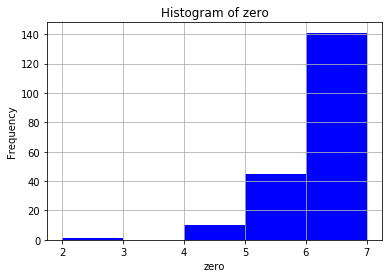

In [41]:
qhist(d,'zero')

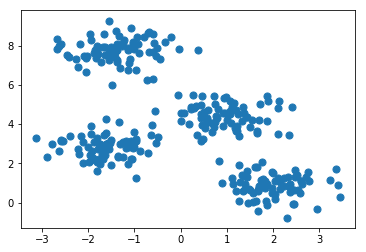

In [42]:
from sklearn.datasets.samples_generator import make_blobs
X,y_true = make_blobs(n_samples=300,centers=4,cluster_std=.60,random_state=0)
plt.scatter(X[:, 0],X[:, 1], s=50);  
 
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X) 
y_kmeans = kmeans.predict(X)

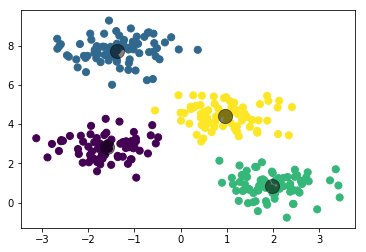

In [43]:
centers = kmeans.cluster_centers_
plt.scatter(X[:,0],X[:,1], c = y_kmeans, s=50, cmap = 'viridis') 
plt.scatter(centers[:,0],centers[:,1], c='black',s=200,alpha=0.5);